In [1]:
import torch
from src.utils.eval import create_grid, eval_kde_on_grid, eval_dist_on_grid, normalize_vals_on_grid, compute_jsd, compute_bd
from src.utils.visualize import visualize_vals_on_grid_2d, visualize_samples_2d

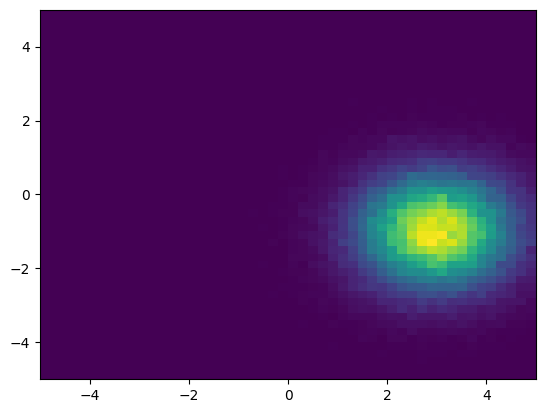

In [2]:
mins = [-5, -5]
maxs = [5, 5]
num = 100

grid = create_grid(mins, maxs, num)

q = torch.distributions.Normal(
    torch.tensor([3, -1], dtype=torch.float), 
    torch.ones(2, dtype=torch.float)
)

q_samples = q.sample((100000,)).numpy()

visualize_samples_2d(q_samples)

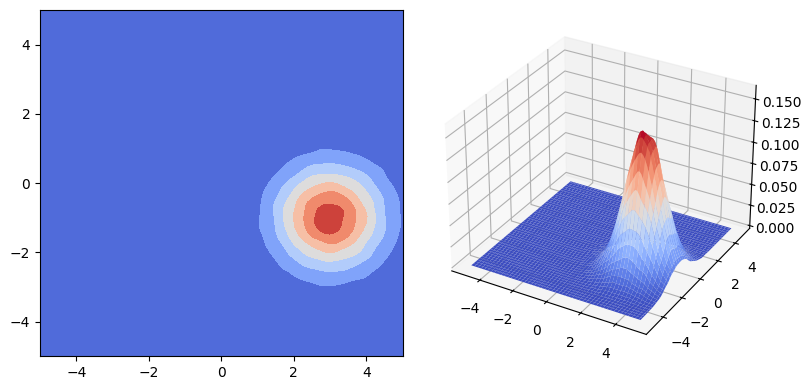

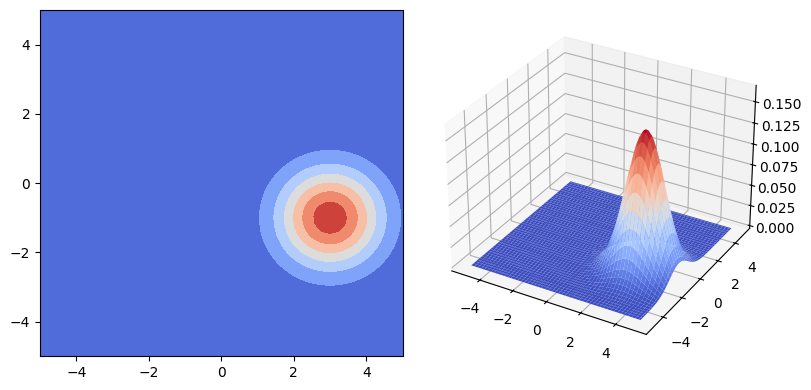

In [3]:
q_vals = eval_kde_on_grid(grid, q_samples)
q_vals = normalize_vals_on_grid(q_vals, mins, maxs, num)
visualize_vals_on_grid_2d(grid, q_vals)

p_vals = eval_dist_on_grid(grid, q)
p_vals = normalize_vals_on_grid(p_vals, mins, maxs, num)
visualize_vals_on_grid_2d(grid, p_vals)

In [4]:
jsd = compute_jsd(p_vals, q_vals)
bd = compute_bd(p_vals, q_vals)
print(jsd, bd)

0.02544217774489991 0.00026069820584077684
